In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/location_rev.csv')

In [3]:
X = df.drop(columns=['revenue'])
y = df['revenue']

In [4]:
X.columns

Index(['num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [7]:
# khởi tạo hàm select
select = SelectKBest(score_func = f_regression, k='all')

In [8]:
feature_score = select.fit(X, y)

In [10]:
df_scores = pd.DataFrame({
    'features': X.columns,
    'score': feature_score.scores_
})
df_scores

,features,score
0,num_competitors,25.117590
1,median_income,566.922357
2,num_loyalty_members,30.949544
3,population_density,107.360798
4,location_age,439.125397


In [11]:
df_scores.sort_values(by='score', ascending = False, inplace=True)
df_scores

,features,score
1,median_income,566.922357
4,location_age,439.125397
3,population_density,107.360798
2,num_loyalty_members,30.949544
0,num_competitors,25.117590


In [12]:
# Correlation matrix
corr = df.corr()
corr

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


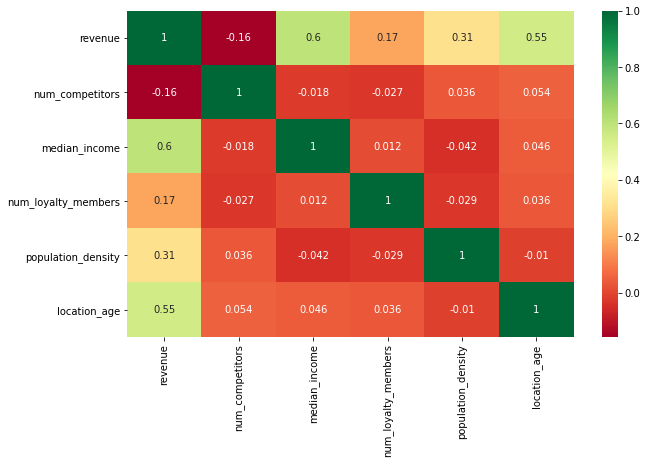

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='RdYlGn', annot=True)
plt.show()

In [16]:
## Build model mới 3 biến có score cao nhất: median_income, location_age và population_density


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
X3 = df[['median_income', 'location_age', 'population_density']]
y3 = df['revenue']

In [22]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=12)

In [20]:
model3 = LinearRegression()

In [23]:
model3.fit(X3_train, y3_train)

LinearRegression()

In [24]:
# đo giá trị R^2 (R-squared) trên train và test
print('R-squared train dataset:', model3.score(X3_train, y3_train))
print('R-squared test dataset:', model3.score(X3_test, y3_test))

R-squared train dataset: 0.7560144162013148
R-squared test dataset: 0.7517140037415128


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
yhat_train = model3.predict(X3_train)
yhat_test = model3.predict(X3_test)

In [27]:
print('RMSE train dataset:', mean_squared_error(y3_train, yhat_train, squared=False))
print('RMSE test dataset:', mean_squared_error(y3_test, yhat_test, squared=False))

RMSE train dataset: 5735.571600269009
RMSE test dataset: 5904.737066604236
